In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_Train, Y_Train), (X_Test, Y_Test) = datasets.cifar10.load_data()

In [3]:
X_Train.shape

(50000, 32, 32, 3)

In [4]:
X_Test.shape

(10000, 32, 32, 3)

In [5]:
X_Train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
X_Train[0].shape

(32, 32, 3)

In [7]:
Y_Train.shape

(50000, 1)

In [8]:
Y_Train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
#Flatten the 2D Matrix
Y_Train = Y_Train.reshape(-1, )
Y_Test = Y_Test.reshape(-1, )
print(Y_Train[:6])
print(Y_Test[:6])

[6 9 9 4 1 1]
[3 8 8 0 6 6]


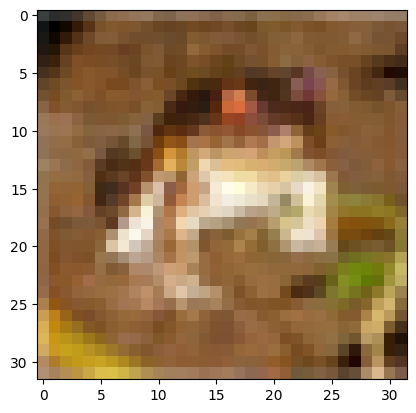

In [10]:
plt.imshow(X_Train[0])

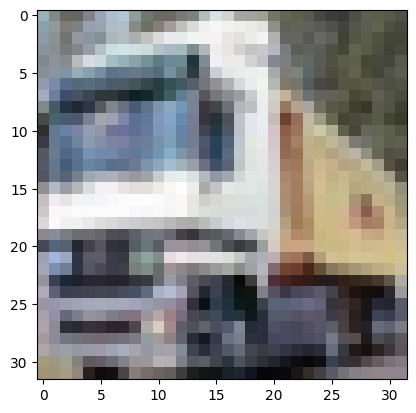

In [11]:
plt.imshow(X_Train[1])

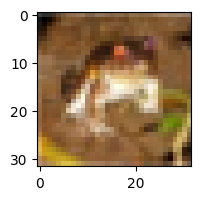

In [12]:
#Resize image
plt.figure(figsize = (15, 2))
plt.imshow(X_Train[0])

In [13]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 

In [14]:
classes[9]

'truck'

In [15]:
#For quick data exploration:
def plot_sample(X, Y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

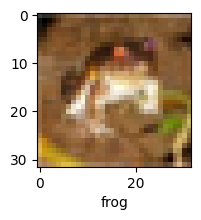

In [16]:
plot_sample(X_Train, Y_Train, 0)

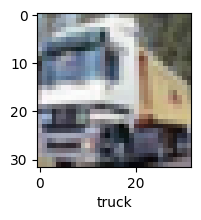

In [17]:
plot_sample(X_Train, Y_Train, 1)

In [18]:
Y_Test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [19]:
#Turns out the X and Y are corresponding, even Test ones

In [20]:
#Now, we normalize our data

In [21]:
X_Train = X_Train/255.0
X_Test = X_Test/255.0

In [22]:
#Simple Artifical Neural Network:

In [23]:
ANN = models.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)),  #Gives warnings
    tf.keras.layers.Dense(3000, activation = 'relu'),
    tf.keras.layers.Dense(1000, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'softmax')])

ANN.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
                          

In [24]:
ANN.fit(X_Train, Y_Train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 11s 5ms/step - loss: 1.8801 - accuracy: 0.3358
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6578 - accuracy: 0.4140
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5678 - accuracy: 0.4451
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5063 - accuracy: 0.4681
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4558 - accuracy: 0.4884


In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
Y_Pred = ANN.predict(X_Test)
Y_Pred_Classes = [np.argmax(element) for element in Y_Pred]

print("Classification Report: \n", classification_report(Y_Test, Y_Pred_Classes))

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.48      0.52      1000
           1       0.58      0.64      0.61      1000
           2       0.49      0.10      0.16      1000
           3       0.42      0.14      0.22      1000
           4       0.42      0.39      0.40      1000
           5       0.47      0.24      0.32      1000
           6       0.49      0.55      0.52      1000
           7       0.26      0.87      0.40      1000
           8       0.69      0.49      0.58      1000
           9       0.59      0.49      0.53      1000

    accuracy                           0.44     10000
   macro avg       0.50      0.44      0.43     10000
weighted avg       0.50      0.44      0.43     10000



In [26]:
print(Y_Pred[:5])  # Predicted probabilities
print(Y_Pred_Classes[:5])  # Predicted class labels
print(Y_Test[:5])  # True class labels

[[2.25966442e-02 5.27834781e-02 9.03911069e-02 2.78510928e-01
  3.72670144e-02 1.54175043e-01 2.65922278e-01 9.25447792e-03
  8.21564123e-02 4.78791352e-03 2.11608512e-05 3.29848735e-05
  3.03178531e-05 3.42604326e-05 3.05149842e-05 2.69880729e-05
  2.28650879e-05 1.75983932e-05 1.92605785e-05 1.39398880e-05
  2.21153859e-05 1.99097994e-05 1.79086637e-05 2.69211359e-05
  2.17938141e-05 2.26467273e-05 2.91965698e-05 1.33904759e-05
  1.55650760e-05 2.75831662e-05 2.17525121e-05 2.58044420e-05
  2.64208356e-05 1.79382332e-05 2.45983611e-05 1.90039700e-05
  2.56403582e-05 2.97738716e-05 2.15658893e-05 3.52561292e-05
  2.39907367e-05 1.87996120e-05 1.72365617e-05 2.89583404e-05
  1.34306338e-05 1.92830739e-05 1.81325740e-05 3.77675715e-05
  5.34722276e-05 2.12414834e-05 2.25808635e-05 1.60487525e-05
  1.80212428e-05 1.64269877e-05 2.20932725e-05 4.13286834e-05
  2.02632946e-05 1.57900431e-05 1.61782973e-05 2.52625887e-05
  3.19318278e-05 2.11097340e-05 2.18573387e-05 1.54667632e-05
  1.7034

In [27]:
#Now let us use CNN to improve performance of model

In [28]:
CNN = models.Sequential([
    #CNN Layer
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),  #Can detect 32 different features/edges
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),  #Can detect 32 different features/edges
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'),  #Can detect 32 different features/edges
    layers.MaxPooling2D((2, 2)),
    
    #Dense Layer, no need to specify space in middle layer
    layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')])  #Softmax layer will normalize probability

In [29]:
'''
Sigmoid:
Class 1: 0.45
Class 2: 0.67

Softmax:
Class 1: (0.45)/(0.45 + 0.67)
Class 2: (0.67)/(0.45 + 0.67)

Sum always 1 of softmax
'''

'\nSigmoid:\nClass 1: 0.45\nClass 2: 0.67\n\nSoftmax:\nClass 1: (0.45)/(0.45 + 0.67)\nClass 2: (0.67)/(0.45 + 0.67)\n\nSum always 1 of softmax\n'

In [30]:
CNN.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [31]:
CNN.fit(X_Train, Y_Train, epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 18s 7ms/step - loss: 1.5282 - accuracy: 0.4458
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1337 - accuracy: 0.6017
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9834 - accuracy: 0.6572
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8789 - accuracy: 0.6921
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7965 - accuracy: 0.7225
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7387 - accuracy: 0.7440
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6868 - accuracy: 0.7586
Epoch 8/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6317 - accuracy: 0.7802
Epoch 9/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5911 - accuracy: 0.7939
Epoch 10/20
1563/1563 [==============================] - 11s 7ms/step - l

In [32]:
CNN.evaluate(X_Test, Y_Test)

313/313 [==============================] - 4s 10ms/step - loss: 1.1870 - accuracy: 0.7093


[1.1869701147079468, 0.7092999815940857]

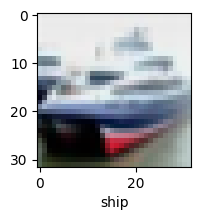

In [33]:
plot_sample(X_Test, Y_Test, 1)

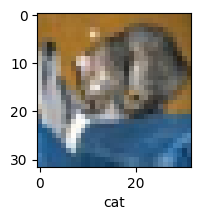

In [34]:
plot_sample(X_Test, Y_Test, 0)

In [35]:
#Now let's use the model to predict this and see how it performs

In [36]:
Y_Pred = CNN.predict(X_Test)
Y_Pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[4.65312361e-04, 2.09846068e-03, 1.12369926e-04, 8.99999976e-01,
        3.43030624e-05, 2.92570777e-02, 4.88137557e-05, 1.39858480e-06,
        6.72686100e-02, 7.13768648e-04],
       [1.30226172e-05, 1.06896096e-07, 7.20985632e-11, 1.10936516e-09,
        2.04606901e-10, 9.19225026e-12, 9.27861998e-15, 1.30784283e-12,
        9.99986887e-01, 4.83893148e-09],
       [1.16153397e-02, 1.74717531e-02, 1.05067773e-03, 8.52172263e-04,
        2.11657560e-03, 4.79778573e-05, 4.77204740e-04, 3.68794979e-04,
        9.59089339e-01, 6.91013318e-03],
       [9.95798647e-01, 4.36637748e-07, 2.43445884e-05, 4.13230055e-07,
        1.97849303e-07, 4.47287448e-07, 3.23105792e-10, 5.94868226e-08,
        4.17528907e-03, 4.73722501e-08],
       [4.20039134e-12, 2.42514986e-09, 1.06833999e-04, 6.73992763e-05,
        6.55225303e-05, 3.12543989e-06, 9.99757111e-01, 1.25104649e-09,
        5.26856406e-11, 6.71138434e-09]], dtype=float32)

In [37]:
#Values in each of these elements are probability distribution between zero and one. It's
#using SoftMax

In [38]:
np.argmax([5, 12, 18])

2

In [39]:
np.argmax(Y_Pred[0])

3

In [40]:
Y_Classes = [np.argmax(element) for element in Y_Pred]
Y_Classes[:5]

[3, 8, 8, 0, 6]

In [41]:
Y_Test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [42]:
#Okay so it prdicted first one as a cat correctly

In [43]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

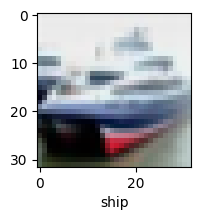

In [44]:
plot_sample(X_Test, Y_Test, 1)

In [45]:
classes[Y_Classes[1]]

'ship'

In [46]:
#Again correctly predicted ship

In [47]:
print("Classification Report: \n", classification_report(Y_Test, Y_Classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.71      0.73      1000
           1       0.83      0.83      0.83      1000
           2       0.67      0.58      0.62      1000
           3       0.47      0.61      0.53      1000
           4       0.68      0.64      0.66      1000
           5       0.65      0.56      0.60      1000
           6       0.76      0.79      0.78      1000
           7       0.74      0.73      0.74      1000
           8       0.77      0.85      0.81      1000
           9       0.81      0.79      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [48]:
#Better numbers. CNN also has less computation due to maxPooling